## Project milk quality

### Objective:
- In this project we are going to the investigative phase of Milk_Diagnostic (a device for collecting and sending milk data on the farm via SMS), we are going to carry out a survey of the variation in milk temperature over a given period. Here we will make a prediction of these temperatures, using reinforcement learning for the next few minutes to alert both the producer and the collecting company about a possible spike in the temperature of the milk stored on the farm, before the event happens.

- Nesse projeto vamos para a fase investigatória do Milk_Diagnostic (aparelho de coleta e envio de dados do leite na fazenda via sms), vamos treinar um modelo de classificação, utilizando modelos de machine learning para demonstrar se a variação de temperatura indica alguma anomalia ou não de contaminação no leite que está armazenado no tanque da fazenda, aguardando ser recolhido.

### Data Origin:
- Dataset: MILK_temperature.TXT

- Through the Milk_Diagnostic equipment (device for collecting and sending milk data on the farm via SMS) data on milk temperature, ambient temperature, date, time, humidity, geographic coordinates, are transferred daily from the farm's milk reservoir every 10 minutes (configurable), 24 hours a day, 7 days a week.

- Através do equipamento Milk_Diagnostic (aparelho de coleta e envio de dados do leite na fazenda via sms)os dados de temperatura do leite, temperatura ambiente, data, hora, umidade, coordenadas geográficas, são transferidos diariamente do reservatório de leite da fazenda a cada 10 minutos (configurável), 24 horas por dia durante os 7 dias da semana.

Aqui está o que as colunas representam:

    local: identificador da fazendo origem do leite
    data: data da coleta da temperatura
    hora: hora, minutos e segundos da coleta da temperatura
    lat: latitude do local da fazenda
    long: longitude do local da fazenda
    umidade: umidade ambiente do local do tanque de leite
    t_ex: temperatura ambiente do local do tanque de leite
    t1, t2, t3, t4, t5, t6, t7, t8: 
        temperaturas coletadas dentro do intervalo configurado para envio (10 minutos para esse trabalho)

- ## Análise exploratória dos dados
- ## Preparação dos dados
- ## Armazenamento dos dados tratados

In [206]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning

In [207]:
# preparação e visualização de dados
from sklearn.compose import ColumnTransformer # Aplica transformadores a colunas de um array ou pandas DataFrame

from sklearn.preprocessing import OrdinalEncoder # convertendo dados categoricos em numerico (categoria sequencial)
from sklearn.preprocessing import OneHotEncoder # convertendo dados categoricos em numerico (categoria - coluna)

from matplotlib import pyplot # plotagem gráfica
import seaborn as sns # plotagem gráfica baseada em matplotlib
import numpy as np # computação de matrizes

In [208]:
# preparação e visualização de dados
from matplotlib import pyplot as plt # plotagem gráfica

In [209]:
# carregando dados do arquivo
df_milk = pd.read_csv('dataset/MILK_temperature.csv', sep='p')

In [210]:
# verificando a quantidade de linhas e colunas do dataframe
df_milk.shape

(14327, 16)

In [211]:
# reconhecendo as primeiras linhas do dataframe
df_milk.head(3)

,local,data,hora,lat,long,umidade,t_ex,t1,t2,t3,t4,t5,t6,t7,t8,Unnamed: 15
0,1,0/ 0/2000,6:36:19,-18.918142,-48.230560,67.000000,26.799999,NAN,10.7400,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1,0/ 0/2000,8:14:46,-18.918184,-48.230553,53.000000,26.700001,NAN,25.0525,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,1,0/ 0/2000,8:34:31,-18.918177,-48.230583,44.000000,26.600000,NAN,24.1150,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [212]:
# eliminando a última coluna sem dados
colunas = list(df_milk.columns)

df_milk = df_milk[colunas[:15]]

In [213]:
# verificando a estrutura das variáveis e se tem algum dados nulo
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14327 entries, 0 to 14326
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   local    14327 non-null  int64  
 1   data     14327 non-null  object 
 2   hora     14327 non-null  object 
 3   lat      14327 non-null  float64
 4   long     14327 non-null  float64
 5   umidade  14327 non-null  object 
 6   t_ex     14327 non-null  object 
 7   t1       14327 non-null  object 
 8   t2       14327 non-null  float64
 9   t3       14327 non-null  float64
 10  t4       14327 non-null  float64
 11  t5       14327 non-null  float64
 12  t6       14327 non-null  float64
 13  t7       14327 non-null  float64
 14  t8       14327 non-null  float64
dtypes: float64(9), int64(1), object(5)
memory usage: 1.6+ MB


In [214]:
# verificando as datas que precisam de correção
df_milk.data.unique()

array([' 0/ 0/2000', ' 1/ 8/2023', ' 1/ 9/2023', ' 1/10/2023',
       ' 1/11/2023', ' 2/ 8/2023', ' 2/10/2023', ' 2/11/2023',
       ' 3/ 8/2023', ' 3/10/2023', ' 3/11/2023', ' 4/ 8/2023',
       ' 4/ 9/2023', ' 4/10/2023', ' 4/11/2023', ' 5/ 8/2023',
       ' 5/10/2023', ' 5/11/2023', ' 5/12/2023', ' 6/ 8/2023',
       ' 6/10/2023', ' 6/11/2023', ' 7/ 8/2023', ' 7/10/2023',
       ' 7/11/2023', ' 8/ 9/2023', ' 8/10/2023', ' 8/11/2023',
       ' 9/ 8/2023', ' 9/ 9/2023', ' 9/10/2023', ' 9/11/2023',
       ' 9/12/2023', '10/ 9/2023', '10/10/2023', '10/11/2023',
       '11/ 8/2023', '11/ 9/2023', '11/10/2023', '12/ 9/2023',
       '12/10/2023', '13/ 7/2023', '13/ 8/2023', '13/ 9/2023',
       '13/10/2023', '14/ 7/2023', '14/ 8/2023', '14/ 9/2023',
       '14/10/2023', '15/ 7/2023', '15/ 8/2023', '15/ 9/2023',
       '15/10/2023', '16/ 7/2023', '16/ 9/2023', '16/10/2023',
       '17/ 7/2023', '17/ 9/2023', '17/10/2023', '18/ 7/2023',
       '18/ 9/2023', '18/10/2023', '19/ 7/2023', '19/ 9

In [215]:
# eliminando data inválida
df_remove = df_milk.loc[(df_milk['data'] == ' 0/ 0/2000')]
df_milk = df_milk.drop(df_remove.index)

In [216]:
# troca espaços por zero na data
def substitui_espacos_data(data): 
    return data.replace(' ', '0')

In [217]:
# troca espaços por zero na hora e modifica hora inválida para nulo
def substitui_espacos_hora(hora): 
    hora = hora.replace(' ', '0')
    
    if hora[3] == ':':
        #hora = '0' + hora[2:]
        hora = None

    return hora

In [218]:
# invoca as funções para substituir espaços por zeros e hora por nulo
df_milk['data'] = df_milk['data'].apply(substitui_espacos_data)
df_milk['hora'] = df_milk['hora'].apply(substitui_espacos_hora)

In [219]:
# cria coluna com data e hora completa
df_milk['data_hora'] = df_milk['data'] + ' ' + df_milk['hora']

In [220]:
# convertendo o tipo de dados da variável
df_milk['t1'] = df_milk['t1'].astype('float64')
df_milk['umidade'] = df_milk['umidade'].astype('float64')
df_milk['t_ex'] = df_milk['t_ex'].astype('float64')
df_milk['data_hora'] = df_milk['data_hora'].astype('datetime64[ns]')

In [221]:
# eliminando mês maior que 07
df_remove = df_milk.loc[(df_milk.data_hora.dt.month > 6)]
df_milk = df_milk.drop(df_remove.index)

- Vamos considerar somente dados até o mês 06 por apresentar melhores dados coletados

In [222]:
# eliminando dados inválidos
df_remove = df_milk.loc[(df_milk['t_ex'] < 0.1) | 
                        (df_milk['t1'] < 0.1) | 
                        (df_milk['t2'] < 0.1) | 
                        (df_milk['t3'] < 0.1) | 
                        (df_milk['t4'] < 0.1) | 
                        (df_milk['t5'] < 0.1) | 
                        (df_milk['t6'] < 0.1) | 
                        (df_milk['t7'] < 0.1) | 
                        (df_milk['t8'] < 0.1) | 
                        (df_milk['umidade'] < 0.1)
                        ]
df_milk = df_milk.drop(df_remove.index)

- Foram eliminadas temperaturas negativas e zeradas

In [223]:
# verificando a existência de nulos
df_milk.isnull().value_counts()

local  data   hora   lat    long   umidade  t_ex   t1     t2     t3     t4     t5     t6     t7     t8     data_hora
False  False  False  False  False  False    False  False  False  False  False  False  False  False  False  False        2058
              True   False  False  False    False  False  False  False  False  False  False  False  False  True         1619
              False  False  False  False    False  True   False  False  False  False  False  False  False  False           5
Name: count, dtype: int64

In [224]:
# confirmando a presença de nulos nos dados
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3682 entries, 11 to 14326
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   local      3682 non-null   int64         
 1   data       3682 non-null   object        
 2   hora       2063 non-null   object        
 3   lat        3682 non-null   float64       
 4   long       3682 non-null   float64       
 5   umidade    3682 non-null   float64       
 6   t_ex       3682 non-null   float64       
 7   t1         3677 non-null   float64       
 8   t2         3682 non-null   float64       
 9   t3         3682 non-null   float64       
 10  t4         3682 non-null   float64       
 11  t5         3682 non-null   float64       
 12  t6         3682 non-null   float64       
 13  t7         3682 non-null   float64       
 14  t8         3682 non-null   float64       
 15  data_hora  2063 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(12), int64(1), 

In [225]:
# confirmando quais variáveis possuem nulos
df_milk.isnull().sum()

local           0
data            0
hora         1619
lat             0
long            0
umidade         0
t_ex            0
t1              5
t2              0
t3              0
t4              0
t5              0
t6              0
t7              0
t8              0
data_hora    1619
dtype: int64

- A hora e t1 possuem nulos que serão eliminados no próximo passo

In [226]:
# apagando linhas com nulos
df_milk = df_milk.dropna()

In [227]:
# verificando se existe registros duplicados
df_milk.duplicated().sum()

2

In [228]:
# apagando linhas duplicadas
df_milk = df_milk.drop_duplicates()

In [229]:
# verificando quantas linhas sobraram
df_milk.shape

(2056, 16)

- Após a eliminação de algumas linhas verificamos que sobrou um nro satisfatório para a realização do nosso treinamento do modelo de aprendizado por reforço.

In [230]:
# ordenando o dataframe pela data e hora
df_milk = df_milk.sort_values(by='data_hora')

In [231]:
# resetando o index e apagando a coluna do indice antigo
df_milk = df_milk.reset_index()
df_milk = df_milk.drop(columns='index')

In [232]:
# fazendo uma análise geral das variáveis que sobraram e suas características
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   local      2056 non-null   int64         
 1   data       2056 non-null   object        
 2   hora       2056 non-null   object        
 3   lat        2056 non-null   float64       
 4   long       2056 non-null   float64       
 5   umidade    2056 non-null   float64       
 6   t_ex       2056 non-null   float64       
 7   t1         2056 non-null   float64       
 8   t2         2056 non-null   float64       
 9   t3         2056 non-null   float64       
 10  t4         2056 non-null   float64       
 11  t5         2056 non-null   float64       
 12  t6         2056 non-null   float64       
 13  t7         2056 non-null   float64       
 14  t8         2056 non-null   float64       
 15  data_hora  2056 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(12), int64(1

In [233]:
# cria uma coluna de média dos 8 valores da temperatura do leite capturados no intervalo de envio
df_milk['temp'] = (df_milk['t1'] + df_milk['t2'] + df_milk['t3'] + df_milk['t4'] + \
                   df_milk['t5'] + df_milk['t6'] + df_milk['t7'] + df_milk['t8']) / 8 

In [234]:
# verificando as variáveis que serão utilizadas nesse trabalho
df_milk[['temp', 't_ex', 'umidade']].head(10)

,temp,t_ex,umidade
0,24.423272,25.892607,47.418488
1,24.360077,25.869171,47.540405
2,24.278691,25.812103,47.464645
3,24.210923,25.660603,47.419193
4,24.170970,25.644939,47.535355
5,24.111838,25.609079,47.424244
6,24.066316,25.467169,47.166668
7,23.982315,25.413635,47.176769
8,23.893088,25.347979,47.060608
9,23.914008,25.316149,47.257576


- A temperatura do leite 'temp' está com um valor acima do normal (seria em torno de 4°) pois foi gerada em laboratório utilizando o milk diagnostic.
- Vamos então fazer uma correção nessa temperatura para aproximá-la da real.

In [235]:
# corrige a temperatura do leite gerada em laboratório
def temperatura_leite(temp):
    if int(temp) > 4:
        temp = (4 + (temp%1)) 

    if temp <= 4.2:
        temp = (3 + (temp%1)) 
    elif temp <= 4.6:
        temp = 4.0
    elif temp <= 4.8:
        temp = (5 + (temp%1)) 
    elif temp <= 4.9:
        temp = (6 + (temp%1))
    else:
        temp = (7 + (temp%1))           
        
    return temp

In [236]:
# invoca a função para correção da temperatura
df_milk.temp = df_milk['temp'].apply(temperatura_leite)

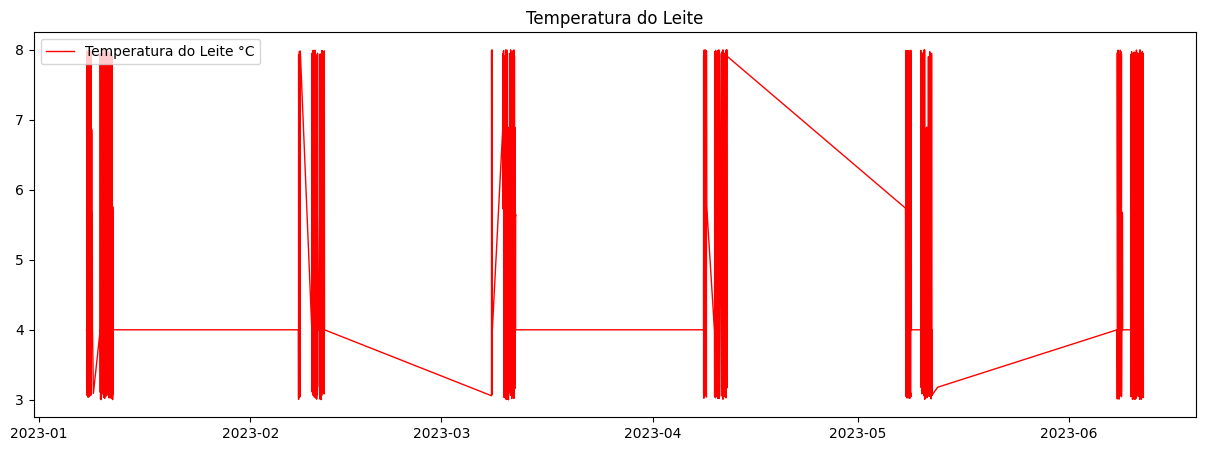

In [237]:
# plotando a evolução da temperatura do leite ajustada
fig,ax = plt.subplots(ncols=1,figsize=(15,5))

plt.plot(df_milk.data_hora, df_milk.temp, label = "Temperatura do Leite °C", linewidth=1, color='red') 

plt.title('Temperatura do Leite')
plt.legend() 

plt.savefig('grafic_image/Dados_temp_leite_fazenda.png', format='png')
plt.show()

- O gráfico nos revela que há períodos de variação estável da temperatura, variando em torno de 3°C e 4°C o que seria normal na refrigeração.

- Vemos que apresenta períodos de picos entre 3°C e 8°C que podem acontecer devido a mistura de leite novo que é acrescentado ao tanque toda manhã ou por anomalias resultado da contaminação do leite, essas variações mais altas são as que nos interessam identificar e avisar ao produtor e à empresa captadora do evento acontecido, servindo também como histórico para o controle de qualidade do leite.

- Esses picos são fundamentais para o treinamento do modelo de aprendizado por reforço, pois são eles que carregam as características de variação da temperatura que será ensinada ao modelo no seu treino.

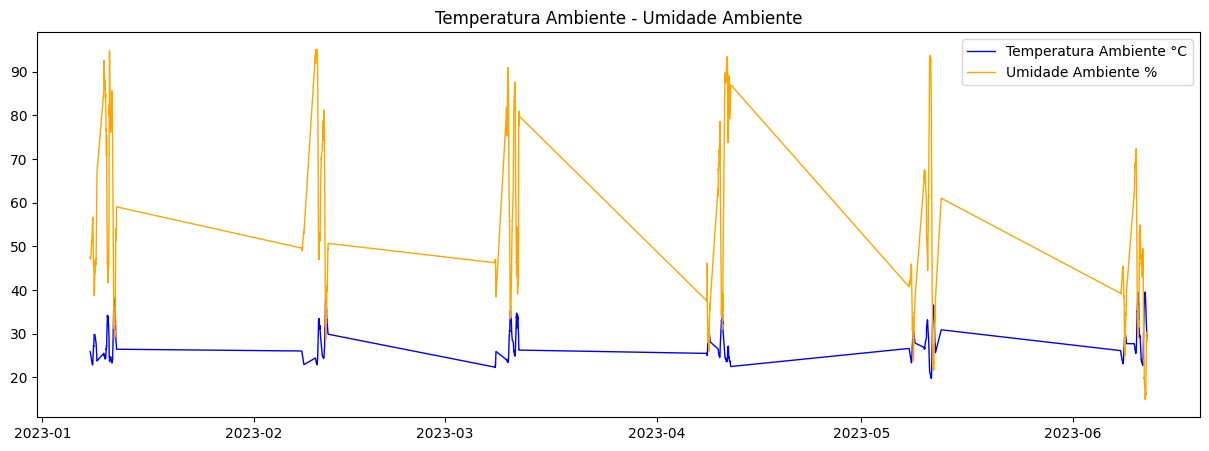

In [238]:
# plotando a evolução da temperatura ambiente e da umidade ambiente onde estava o aparelho Milk Diagnostic
fig,ax = plt.subplots(ncols=1,figsize=(15,5))

plt.plot(df_milk.data_hora, df_milk.t_ex, label = "Temperatura Ambiente °C", linewidth=1, color='blue') 
plt.plot(df_milk.data_hora, df_milk.umidade, label = "Umidade Ambiente %", linewidth=1, color='orange')  

plt.title('Temperatura Ambiente - Umidade Ambiente')
plt.legend() 

plt.savefig('grafic_image/Dados_ambiente_leite_fazenda.png', format='png')
plt.show()

- Observamos houve uma variação normal tanto da umidade ambiente (entre 10% e 95%) como da temperatura ambiente (entre 20°C e 35°C).

In [239]:
# separa parte inteira de numero
def inteiro(nro):
    return int(nro)

In [247]:
# verificando o percentual das faixas de temperaturas existentes
dfx=df_milk[['temp']]
dfx['temp_int'] = dfx.temp.apply(inteiro)
print(dfx.temp_int.value_counts(normalize=True)*100)

temp_int
4    44.492912
5    22.464558
3    22.355507
6    10.687023
Name: proportion, dtype: float64


In [241]:
# eliminando mês maior ou igual que 07
df_remove = df_milk.loc[(df_milk.temp >= 7)]
df_milk = df_milk.drop(df_remove.index)

In [242]:
# define coluna anormal
def anormal(temp):
    anormal=0
    if temp<3.5 or temp>4.5:
        anormal=1
    
    return anormal

In [243]:
# invoca função para criar coluna anormal
df_milk['anormal'] = df_milk.temp.apply(anormal)

In [244]:
# verifica variavel criada
df_milk.head(5)

,local,data,hora,lat,long,umidade,t_ex,t1,t2,t3,t4,t5,t6,t7,t8,data_hora,temp,anormal
0,1,01/08/2023,00:09:30,-18.918173,-48.230431,47.418488,25.892607,24.409178,24.427492,24.427492,24.427549,24.427597,24.427624,24.423851,24.415396,2023-01-08 00:09:30,4.00000,0
1,1,01/08/2023,00:19:30,-18.918213,-48.230457,47.540405,25.869171,24.345068,24.364992,24.364992,24.365047,24.365095,24.365124,24.359230,24.351067,2023-01-08 00:19:30,4.00000,0
2,1,01/08/2023,00:29:30,-18.918280,-48.230495,47.464645,25.812103,24.269100,24.302492,24.297718,24.280001,24.270069,24.265360,24.271393,24.273392,2023-01-08 00:29:30,4.00000,0
3,1,01/08/2023,00:39:30,-18.918213,-48.230446,47.419193,25.660603,24.214598,24.221876,24.217857,24.204088,24.197790,24.205063,24.211004,24.215107,2023-01-08 00:39:30,4.00000,0
4,1,01/08/2023,00:49:30,-18.918257,-48.230518,47.535355,25.644939,24.157568,24.172058,24.175756,24.176691,24.176956,24.177114,24.167929,24.163687,2023-01-08 00:49:30,3.17097,1


In [245]:
# verificando o percentual da variável anormal
print(df_milk.anormal.value_counts(normalize=True)*100)

anormal
1    55.507088
0    44.492912
Name: proportion, dtype: float64


In [248]:
# listando a relação de colunas
list(df_milk.columns)

['local',
 'data',
 'hora',
 'lat',
 'long',
 'umidade',
 't_ex',
 't1',
 't2',
 't3',
 't4',
 't5',
 't6',
 't7',
 't8',
 'data_hora',
 'temp',
 'anormal']

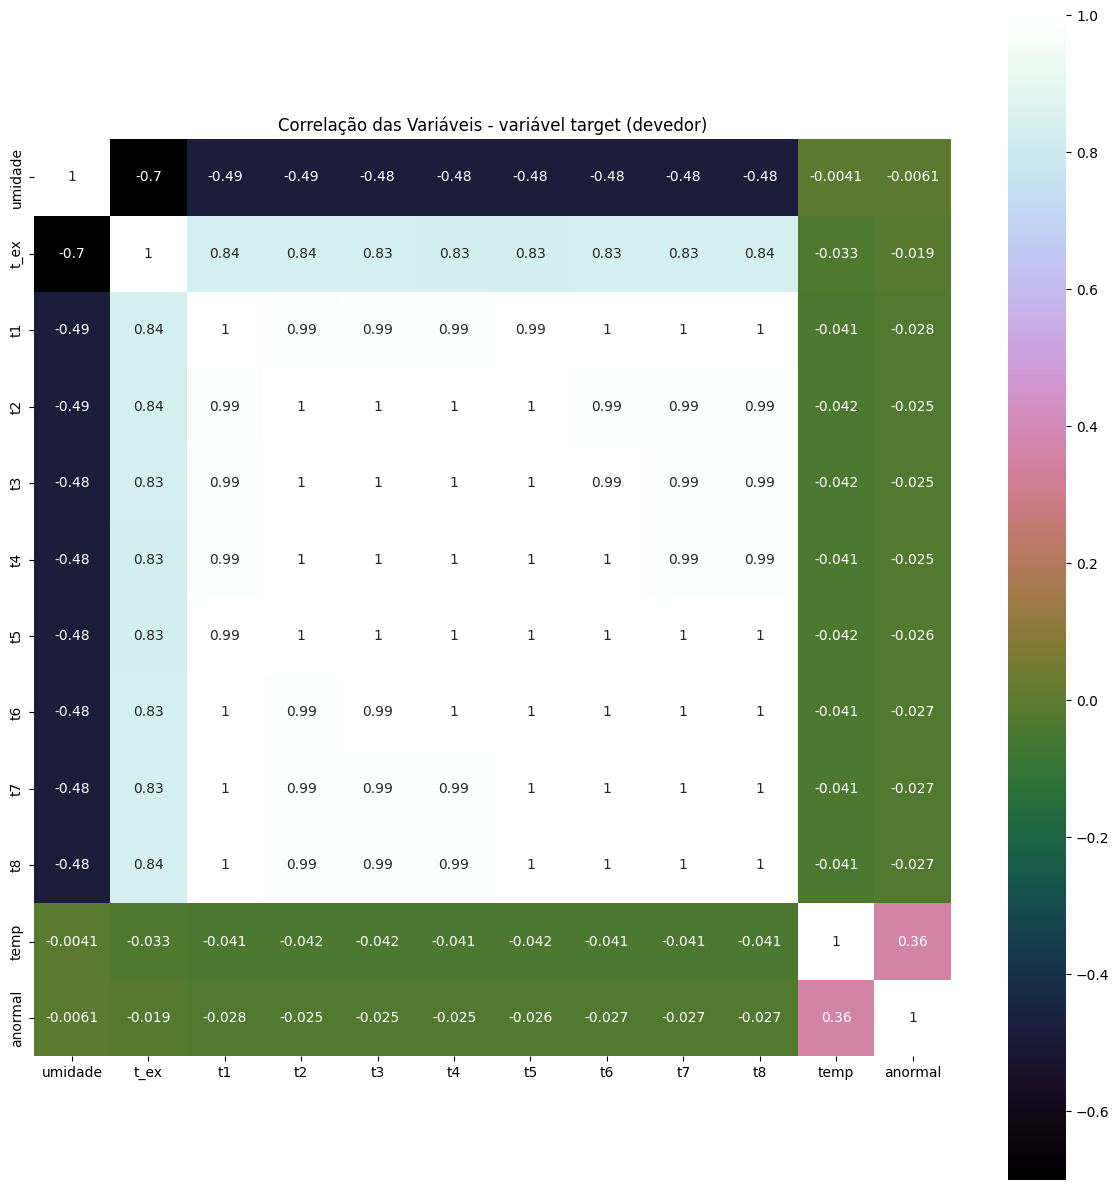

In [249]:
# analisando a correlação entre as variáveis
lista_corr = list([ 'umidade',
                    't_ex',
                    't1',
                    't2',
                    't3',
                    't4',
                    't5',
                    't6',
                    't7',
                    't8',
                    'temp',
                    'anormal'])

fig, axs = pyplot.subplots(nrows=1, ncols=1, figsize=(12,12))

correlation = df_milk[lista_corr].corr()
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix', ax=axs)

axs.set_title('Correlação das Variáveis - variável target (devedor)')
fig.tight_layout()

pyplot.show()

In [ ]:
# criando uma lista sem a variável devedor (target) para fazer a correlação
lista_corr[1:]

['atende_criterios',
 'vr_parcelas',
 'pont_mutuario',
 'dias_credito',
 'saldo_rotativo',
 'tx_util_credito',
 'consult_mutuario_cred',
 'nro_atraso',
 'nro_reg_deprec',
 'tx_juros',
 'log_renda_anual',
 'idx_div_renda']

In [ ]:
# criando uma lista das colunas com menos de 0.03 (3%) de correlação
correlation = df_milk[lista_corr[:]].corr()
correlation_devedor = abs(correlation['devedor'])
drop_list_corr = sorted(list(correlation_devedor[correlation_devedor < 0.0300].index))
print(drop_list_corr)

['dias_credito', 'nro_atraso']


- As colunas com corelação menor que 3% com a variável alvo serão eliminadas por apresentarem um percentual muito baixo podendo prejudicar nosso trabalho.

In [ ]:
# verificando as colunas do dataframe antes da exclusão
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   atende_criterios       9578 non-null   int64  
 1   utilizacao             9578 non-null   object 
 2   tx_juros               9578 non-null   float64
 3   vr_parcelas            9578 non-null   float64
 4   log_renda_anual        9578 non-null   float64
 5   idx_div_renda          9578 non-null   float64
 6   pont_mutuario          9578 non-null   int64  
 7   dias_credito           9578 non-null   float64
 8   saldo_rotativo         9578 non-null   int64  
 9   tx_util_credito        9578 non-null   float64
 10  consult_mutuario_cred  9578 non-null   int64  
 11  nro_atraso             9578 non-null   int64  
 12  nro_reg_deprec         9578 non-null   int64  
 13  devedor                9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB

In [ ]:
# apagando colunas com correlação menor que 3%
df_milk.drop(labels=drop_list_corr, axis=1, inplace=True) 

In [ ]:
# verificando as colunas que sobraram
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   atende_criterios       9578 non-null   int64  
 1   utilizacao             9578 non-null   object 
 2   tx_juros               9578 non-null   float64
 3   vr_parcelas            9578 non-null   float64
 4   log_renda_anual        9578 non-null   float64
 5   idx_div_renda          9578 non-null   float64
 6   pont_mutuario          9578 non-null   int64  
 7   saldo_rotativo         9578 non-null   int64  
 8   tx_util_credito        9578 non-null   float64
 9   consult_mutuario_cred  9578 non-null   int64  
 10  nro_reg_deprec         9578 non-null   int64  
 11  devedor                9578 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 898.1+ KB


- Foram excluidas 2 colunas com percentual de correlaçaõ abaixo de 3% nos sobrando 12 colunas para trabalharmos

In [ ]:
# reduzindo as casas decimais para facilitar o agrupamento dos valores com menor ocorrência
df_milk['tx_juros'] = round(df_milk['tx_juros'], 2)
df_milk['vr_parcelas'] = round(df_milk['vr_parcelas'], 0)
df_milk['log_renda_anual'] = round(df_milk['log_renda_anual'], 0)
df_milk['idx_div_renda'] = round(df_milk['idx_div_renda'], 0)

In [ ]:
# analizando o percentual de ocorrência de cada valor para ver quais valores muito pequenos precisam ser juntados
# com outros maiores
print(df_milk.atende_criterios.value_counts(normalize=True)*100)
print('')
print(df_milk.utilizacao.value_counts(normalize=True)*100)
print('')
print(df_milk.tx_juros.value_counts(normalize=True)*100)
print('')
print(df_milk.vr_parcelas.value_counts(normalize=True).head(20)*100)
print('')
print(df_milk.log_renda_anual.value_counts(normalize=True)*100)
print('')
print(df_milk.idx_div_renda.value_counts(normalize=True)*100)
print('')
print(df_milk.pont_mutuario.value_counts(normalize=True)*100)
print('')
print(df_milk.saldo_rotativo.value_counts(normalize=True).head(20)*100)
print('')
print(df_milk.tx_util_credito.value_counts(normalize=True).head(20)*100)
print('')
print(df_milk.consult_mutuario_cred.value_counts(normalize=True)*100)
print('')
print(df_milk.nro_reg_deprec.value_counts(normalize=True)*100)
print('')
print(df_milk.devedor.value_counts(normalize=True)*100)

atende_criterios
1    80.496972
0    19.503028
Name: proportion, dtype: float64

utilizacao
debt_consolidation    41.313427
all_other             24.337022
credit_card           13.176028
home_improvement       6.567133
small_business         6.462727
major_purchase         4.562539
educational            3.581123
Name: proportion, dtype: float64

tx_juros
0.13    16.892880
0.12    13.468365
0.11    12.330340
0.14    12.257256
0.09     9.135519
0.15     8.540405
0.10     7.151806
0.08     7.068281
0.16     5.345584
0.17     2.463980
0.07     2.150762
0.18     1.639173
0.19     0.897891
0.20     0.313218
0.21     0.198371
0.06     0.125287
0.22     0.020881
Name: proportion, dtype: float64

vr_parcelas
156.0    0.636876
170.0    0.626436
164.0    0.605554
166.0    0.553351
160.0    0.542911
318.0    0.532470
168.0    0.511589
316.0    0.490708
333.0    0.480267
172.0    0.480267
336.0    0.459386
328.0    0.428064
202.0    0.417624
167.0    0.417624
96.0     0.417624
269.0    0.407183
1

In [ ]:
# verificando os primeiro registros do df
df_milk.head(3)

,atende_criterios,utilizacao,tx_juros,vr_parcelas,log_renda_anual,idx_div_renda,pont_mutuario,saldo_rotativo,tx_util_credito,consult_mutuario_cred,nro_reg_deprec,devedor
0,1,debt_consolidation,0.12,829.0,11.0,19.0,737,28854,52.1,0,0,0
1,1,credit_card,0.11,228.0,11.0,14.0,707,33623,76.7,0,0,0
2,1,debt_consolidation,0.14,367.0,10.0,12.0,682,3511,25.6,1,0,0


In [ ]:
# agrupando os valores com ocorrência menor que 3% com o próximo valor acima
df_milk.tx_juros[df_milk['tx_juros'].isin([0.17, 0.19, 0.20, 0.21, 0.22])] = 0.18
df_milk.tx_juros[df_milk['tx_juros'].isin([0.06, 0.07])] = 0.08

df_milk.log_renda_anual[df_milk['log_renda_anual'].isin([13, 14, 15])] = 12
df_milk.log_renda_anual[df_milk['log_renda_anual'].isin([8, 9])] = 10

df_milk.idx_div_renda[df_milk['idx_div_renda'] > 23] = 23
df_milk.idx_div_renda[df_milk['idx_div_renda'].isin([0, 2])] = 1

df_milk.pont_mutuario[df_milk['pont_mutuario'].isin([747])] = 752
df_milk.pont_mutuario[df_milk['pont_mutuario'].isin([762])] = 757
df_milk.pont_mutuario[df_milk['pont_mutuario'].isin([767,777,652,657,782])] = 772 
df_milk.pont_mutuario[df_milk['pont_mutuario'].isin([642,792,787,797])] = 647                                                               

df_milk.pont_mutuario[df_milk['pont_mutuario'].isin([807,812,632,817,822,637,627,612,827,617,622,737])] = 802

df_milk.consult_mutuario_cred[df_milk['consult_mutuario_cred'] > 5] = 5

df_milk.nro_reg_deprec[df_milk['nro_reg_deprec'] > 1] = 1

In [ ]:
# analizando o percentual de ocorrência de cada valor para ver como ficou ajuntando com valores maiores
print(df_milk.tx_juros.value_counts(normalize=True)*100)
print('')
print(df_milk.log_renda_anual.value_counts(normalize=True)*100)
print('')
print(df_milk.idx_div_renda.value_counts(normalize=True)*100)
print('')
print(df_milk.pont_mutuario.value_counts(normalize=True)*100)
print('')
print(df_milk.consult_mutuario_cred.value_counts(normalize=True)*100)
print('')
print(df_milk.nro_reg_deprec.value_counts(normalize=True)*100)

tx_juros
0.13    16.892880
0.12    13.468365
0.11    12.330340
0.14    12.257256
0.08     9.344331
0.09     9.135519
0.15     8.540405
0.10     7.151806
0.18     5.533514
0.16     5.345584
Name: proportion, dtype: float64

log_renda_anual
11.0    61.641261
10.0    22.447275
12.0    15.911464
Name: proportion, dtype: float64

idx_div_renda
1.0     8.571727
23.0    8.206306
14.0    5.105450
15.0    5.074128
10.0    4.938401
9.0     4.781792
11.0    4.677386
16.0    4.646064
12.0    4.583420
13.0    4.489455
18.0    4.343287
17.0    4.259762
8.0     4.082272
7.0     4.061391
19.0    3.852579
20.0    3.779495
6.0     3.716851
22.0    3.654208
5.0     3.414074
4.0     3.330549
21.0    3.309668
3.0     3.121737
Name: proportion, dtype: float64

pont_mutuario
772    8.519524
687    5.721445
682    5.596158
692    5.199415
752    5.157653
697    4.969722
802    4.959282
702    4.927960
647    4.927960
757    4.708707
707    4.635623
667    4.572980
677    4.458133
717    4.426811
662    4.3224

In [ ]:
# analisando as estatísticas básicas de cada variável
df_milk[list(df_milk.columns)].describe()

,atende_criterios,tx_juros,vr_parcelas,log_renda_anual,idx_div_renda,pont_mutuario,saldo_rotativo,tx_util_credito,consult_mutuario_cred,nro_reg_deprec,devedor
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.123019,319.093861,10.934642,12.489037,712.401441,1.691396e+04,46.799236,1.409689,0.058363,0.160054
std,0.396245,0.026290,207.064886,0.615918,6.693325,39.972557,3.375619e+04,29.014417,1.557783,0.234441,0.366676
min,0.000000,0.080000,16.000000,10.000000,1.000000,647.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.100000,164.000000,11.000000,7.000000,682.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000
50%,1.000000,0.120000,269.000000,11.000000,13.000000,707.000000,8.596000e+03,46.300000,1.000000,0.000000,0.000000
75%,1.000000,0.140000,432.750000,11.000000,18.000000,742.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000
max,1.000000,0.180000,940.000000,12.000000,23.000000,802.000000,1.207359e+06,119.000000,5.000000,1.000000,1.000000


- Observamos que existem alguns valores minimos e máximos que são bastante expressivos em tamanho e outros bastante pequenos.

In [ ]:
# criando faixas de valores categorizando
df = df_milk
df['tx_juros'] = df['tx_juros'] * 100
faixas = np.arange(0, df['tx_juros'].max()+1, 2)
df['tx_juros_faixa'] = pd.cut(df['tx_juros'], faixas)

print('nulos', df.tx_juros_faixa.isnull().sum())
print('')
print(df[['tx_juros', 'tx_juros_faixa']].head(10))
print('')
print(df.tx_juros_faixa.value_counts(normalize=True)*100, '%')

df_milk = df

nulos 0

   tx_juros tx_juros_faixa
0      12.0   (10.0, 12.0]
1      11.0   (10.0, 12.0]
2      14.0   (14.0, 16.0]
3      10.0    (8.0, 10.0]
4      14.0   (14.0, 16.0]
5       8.0     (6.0, 8.0]
6      15.0   (14.0, 16.0]
7      11.0   (10.0, 12.0]
8      11.0   (10.0, 12.0]
9      12.0   (10.0, 12.0]

tx_juros_faixa
(14.0, 16.0]    26.143245
(10.0, 12.0]    25.798705
(12.0, 14.0]    16.892880
(8.0, 10.0]     16.287325
(6.0, 8.0]       9.344331
(16.0, 18.0]     5.533514
(0.0, 2.0]       0.000000
(2.0, 4.0]       0.000000
(4.0, 6.0]       0.000000
Name: proportion, dtype: float64 %


In [ ]:
# criando faixas de valores categorizando
df = df_milk
faixas = np.arange(0, df['vr_parcelas'].max()+1, 130)
df['vr_parcelas_faixa'] = pd.cut(df['vr_parcelas'], faixas)

print('nulos', df.vr_parcelas_faixa.isnull().sum())
print('')
print(df[['vr_parcelas', 'vr_parcelas_faixa']].head(10))
print('')
print(df.vr_parcelas_faixa.value_counts(normalize=True)*100, '%')

df_milk = df

nulos 13

   vr_parcelas vr_parcelas_faixa
0        829.0    (780.0, 910.0]
1        228.0    (130.0, 260.0]
2        367.0    (260.0, 390.0]
3        162.0    (130.0, 260.0]
4        103.0      (0.0, 130.0]
5        125.0      (0.0, 130.0]
6        194.0    (130.0, 260.0]
7        131.0    (130.0, 260.0]
8         87.0      (0.0, 130.0]
9         84.0      (0.0, 130.0]

vr_parcelas_faixa
(130.0, 260.0]    30.883429
(260.0, 390.0]    21.871406
(0.0, 130.0]      17.198118
(390.0, 520.0]    13.727130
(520.0, 650.0]     6.021955
(650.0, 780.0]     5.729221
(780.0, 910.0]     4.568740
Name: proportion, dtype: float64 %


In [ ]:
# criando faixas de valores categorizando
df = df_milk
faixas = np.arange(0, df['log_renda_anual'].max()+1, 1)
df['log_renda_anual_faixa'] = pd.cut(df['log_renda_anual'], faixas)

print('nulos', df.log_renda_anual_faixa.isnull().sum())
print('')
print(df[['log_renda_anual', 'log_renda_anual_faixa']].head(10))
print('')
print(df.log_renda_anual_faixa.value_counts(normalize=True)*100, '%')

df_milk = df

nulos 0

   log_renda_anual log_renda_anual_faixa
0             11.0          (10.0, 11.0]
1             11.0          (10.0, 11.0]
2             10.0           (9.0, 10.0]
3             11.0          (10.0, 11.0]
4             11.0          (10.0, 11.0]
5             12.0          (11.0, 12.0]
6             11.0          (10.0, 11.0]
7             11.0          (10.0, 11.0]
8             11.0          (10.0, 11.0]
9             10.0           (9.0, 10.0]

log_renda_anual_faixa
(10.0, 11.0]    61.641261
(9.0, 10.0]     22.447275
(11.0, 12.0]    15.911464
(0.0, 1.0]       0.000000
(1.0, 2.0]       0.000000
(2.0, 3.0]       0.000000
(3.0, 4.0]       0.000000
(4.0, 5.0]       0.000000
(5.0, 6.0]       0.000000
(6.0, 7.0]       0.000000
(7.0, 8.0]       0.000000
(8.0, 9.0]       0.000000
Name: proportion, dtype: float64 %


In [ ]:
# criando faixas de valores categorizando
df = df_milk
faixas = np.arange(0, df['idx_div_renda'].max()+1, 1)
df['idx_div_renda_faixa'] = pd.cut(df['idx_div_renda'], faixas)

print('nulos', df.idx_div_renda_faixa.isnull().sum())
print('')
print(df[['idx_div_renda', 'idx_div_renda_faixa']].head(10))
print('')
print(df.idx_div_renda_faixa.value_counts(normalize=True)*100, '%')

df_milk = df

nulos 0

   idx_div_renda idx_div_renda_faixa
0           19.0        (18.0, 19.0]
1           14.0        (13.0, 14.0]
2           12.0        (11.0, 12.0]
3            8.0          (7.0, 8.0]
4           15.0        (14.0, 15.0]
5           17.0        (16.0, 17.0]
6            4.0          (3.0, 4.0]
7           11.0        (10.0, 11.0]
8           17.0        (16.0, 17.0]
9           10.0         (9.0, 10.0]

idx_div_renda_faixa
(0.0, 1.0]      8.571727
(22.0, 23.0]    8.206306
(13.0, 14.0]    5.105450
(14.0, 15.0]    5.074128
(9.0, 10.0]     4.938401
(8.0, 9.0]      4.781792
(10.0, 11.0]    4.677386
(15.0, 16.0]    4.646064
(11.0, 12.0]    4.583420
(12.0, 13.0]    4.489455
(17.0, 18.0]    4.343287
(16.0, 17.0]    4.259762
(7.0, 8.0]      4.082272
(6.0, 7.0]      4.061391
(18.0, 19.0]    3.852579
(19.0, 20.0]    3.779495
(5.0, 6.0]      3.716851
(21.0, 22.0]    3.654208
(4.0, 5.0]      3.414074
(3.0, 4.0]      3.330549
(20.0, 21.0]    3.309668
(2.0, 3.0]      3.121737
(1.0, 2.0]   

In [ ]:
# criando faixas de valores categorizando
df = df_milk
faixas = np.arange(0, df['pont_mutuario'].max()+1, 2)
df['pont_mutuario_faixa'] = pd.cut(df['pont_mutuario'], faixas)

print('nulos', df.pont_mutuario_faixa.isnull().sum())
print('')
print(df[['pont_mutuario', 'pont_mutuario_faixa']].head(25))
print('')
print(df.pont_mutuario_faixa.value_counts(normalize=True).head(25)*100, '%')

df_milk = df

nulos 0

    pont_mutuario pont_mutuario_faixa
0             802          (800, 802]
1             707          (706, 708]
2             682          (680, 682]
3             712          (710, 712]
4             667          (666, 668]
5             727          (726, 728]
6             667          (666, 668]
7             722          (720, 722]
8             682          (680, 682]
9             707          (706, 708]
10            677          (676, 678]
11            662          (660, 662]
12            772          (770, 772]
13            752          (750, 752]
14            727          (726, 728]
15            702          (700, 702]
16            672          (670, 672]
17            647          (646, 648]
18            712          (710, 712]
19            667          (666, 668]
20            772          (770, 772]
21            647          (646, 648]
22            662          (660, 662]
23            772          (770, 772]
24            672          (670, 672]

po

In [ ]:
# aplicando transformação logaritma no saldo rotativo 
df_milk['log_saldo_rotativo'] = df_milk['saldo_rotativo'].apply(lambda x: np.log10(x+1))
# arredondando os valores para reduzir o nro de faixas
df_milk['log_saldo_rotativo'] = round(df_milk['log_saldo_rotativo'], 0)

print('log_saldo_rotativo', df_milk.log_saldo_rotativo.head(3))
print('')

# criando faixas de valores categorizando
df = df_milk
faixas = np.arange(0, df['log_saldo_rotativo'].max()+1, 3)
df['log_saldo_rotativo_faixa'] = pd.cut(df['log_saldo_rotativo'], faixas)

print('nulos', df.log_saldo_rotativo_faixa.isnull().sum())
print('')
print(df[['log_saldo_rotativo', 'log_saldo_rotativo_faixa']].head(10))
print('')
print(df.log_saldo_rotativo_faixa.value_counts(normalize=True)*100, '%')

df_milk = df

log_saldo_rotativo 0    4.0
1    5.0
2    4.0
Name: log_saldo_rotativo, dtype: float64

nulos 328

   log_saldo_rotativo log_saldo_rotativo_faixa
0                 4.0               (3.0, 6.0]
1                 5.0               (3.0, 6.0]
2                 4.0               (3.0, 6.0]
3                 5.0               (3.0, 6.0]
4                 4.0               (3.0, 6.0]
5                 5.0               (3.0, 6.0]
6                 4.0               (3.0, 6.0]
7                 4.0               (3.0, 6.0]
8                 5.0               (3.0, 6.0]
9                 4.0               (3.0, 6.0]

log_saldo_rotativo_faixa
(3.0, 6.0]    77.794595
(0.0, 3.0]    22.205405
Name: proportion, dtype: float64 %


- O saldo rotativo é composto por valores muito altos o que dificultava a criação de faixas categóricas, dessa forma foi aplicado a transformação logaritma para redução dos mesmo facilitando a criação das faixas.

In [ ]:
# criando faixas de valores categorizando
df = df_milk
faixas = np.arange(0, df['tx_util_credito'].max()+1, 15)
df['tx_util_credito_faixa'] = pd.cut(df['tx_util_credito'], faixas)

print('nulos', df.tx_util_credito_faixa.isnull().sum())
print('')
print(df[['tx_util_credito', 'tx_util_credito_faixa']].head(10))
print('')
print(df.tx_util_credito_faixa.value_counts(normalize=True)*100, '%')

df_milk = df

nulos 306

   tx_util_credito tx_util_credito_faixa
0             52.1          (45.0, 60.0]
1             76.7          (75.0, 90.0]
2             25.6          (15.0, 30.0]
3             73.2          (60.0, 75.0]
4             39.5          (30.0, 45.0]
5             51.0          (45.0, 60.0]
6             76.8          (75.0, 90.0]
7             68.6          (60.0, 75.0]
8             51.1          (45.0, 60.0]
9             23.0          (15.0, 30.0]

tx_util_credito_faixa
(30.0, 45.0]     16.846419
(45.0, 60.0]     16.458154
(0.0, 15.0]      15.692407
(60.0, 75.0]     14.764884
(15.0, 30.0]     14.603106
(75.0, 90.0]     13.427524
(90.0, 105.0]     8.207506
Name: proportion, dtype: float64 %


In [ ]:
# verificando as variáveis de faixas categóricas incluidas
df_milk.head(3)

,atende_criterios,utilizacao,tx_juros,vr_parcelas,log_renda_anual,idx_div_renda,pont_mutuario,saldo_rotativo,tx_util_credito,consult_mutuario_cred,nro_reg_deprec,devedor,tx_juros_faixa,vr_parcelas_faixa,log_renda_anual_faixa,idx_div_renda_faixa,pont_mutuario_faixa,log_saldo_rotativo,log_saldo_rotativo_faixa,tx_util_credito_faixa
0,1,debt_consolidation,12.0,829.0,11.0,19.0,802,28854,52.1,0,0,0,"(10.0, 12.0]","(780.0, 910.0]","(10.0, 11.0]","(18.0, 19.0]","(800, 802]",4.0,"(3.0, 6.0]","(45.0, 60.0]"
1,1,credit_card,11.0,228.0,11.0,14.0,707,33623,76.7,0,0,0,"(10.0, 12.0]","(130.0, 260.0]","(10.0, 11.0]","(13.0, 14.0]","(706, 708]",5.0,"(3.0, 6.0]","(75.0, 90.0]"
2,1,debt_consolidation,14.0,367.0,10.0,12.0,682,3511,25.6,1,0,0,"(14.0, 16.0]","(260.0, 390.0]","(9.0, 10.0]","(11.0, 12.0]","(680, 682]",4.0,"(3.0, 6.0]","(15.0, 30.0]"


In [ ]:
# verificando a existência de nulos
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   atende_criterios          9578 non-null   int64   
 1   utilizacao                9578 non-null   object  
 2   tx_juros                  9578 non-null   float64 
 3   vr_parcelas               9578 non-null   float64 
 4   log_renda_anual           9578 non-null   float64 
 5   idx_div_renda             9578 non-null   float64 
 6   pont_mutuario             9578 non-null   int64   
 7   saldo_rotativo            9578 non-null   int64   
 8   tx_util_credito           9578 non-null   float64 
 9   consult_mutuario_cred     9578 non-null   int64   
 10  nro_reg_deprec            9578 non-null   int64   
 11  devedor                   9578 non-null   int64   
 12  tx_juros_faixa            9578 non-null   category
 13  vr_parcelas_faixa         9565 non-null   catego

- Verificamos a existência de alguns nulos após a geração das faixas categóricas

In [ ]:
# confirmando os nulos existentes
df_milk.isnull().sum()

atende_criterios              0
utilizacao                    0
tx_juros                      0
vr_parcelas                   0
log_renda_anual               0
idx_div_renda                 0
pont_mutuario                 0
saldo_rotativo                0
tx_util_credito               0
consult_mutuario_cred         0
nro_reg_deprec                0
devedor                       0
tx_juros_faixa                0
vr_parcelas_faixa            13
log_renda_anual_faixa         0
idx_div_renda_faixa           0
pont_mutuario_faixa           0
log_saldo_rotativo            0
log_saldo_rotativo_faixa    328
tx_util_credito_faixa       306
dtype: int64

In [ ]:
# eliminando os registros com nulos
df_milk = df_milk.dropna()

In [ ]:
# verificando se ainda existem nulos
df_milk.isnull().sum()

atende_criterios            0
utilizacao                  0
tx_juros                    0
vr_parcelas                 0
log_renda_anual             0
idx_div_renda               0
pont_mutuario               0
saldo_rotativo              0
tx_util_credito             0
consult_mutuario_cred       0
nro_reg_deprec              0
devedor                     0
tx_juros_faixa              0
vr_parcelas_faixa           0
log_renda_anual_faixa       0
idx_div_renda_faixa         0
pont_mutuario_faixa         0
log_saldo_rotativo          0
log_saldo_rotativo_faixa    0
tx_util_credito_faixa       0
dtype: int64

In [ ]:
# verificando quantos registros restaram
df_milk.shape

(9188, 20)

In [ ]:
# lista as colunas do dataframe
list(df_milk.columns)

['atende_criterios',
 'utilizacao',
 'tx_juros',
 'vr_parcelas',
 'log_renda_anual',
 'idx_div_renda',
 'pont_mutuario',
 'saldo_rotativo',
 'tx_util_credito',
 'consult_mutuario_cred',
 'nro_reg_deprec',
 'devedor',
 'tx_juros_faixa',
 'vr_parcelas_faixa',
 'log_renda_anual_faixa',
 'idx_div_renda_faixa',
 'pont_mutuario_faixa',
 'log_saldo_rotativo',
 'log_saldo_rotativo_faixa',
 'tx_util_credito_faixa']

In [ ]:
# definindo lista de colunas onehot e ordinal para serem transformadas
colunas_onehot = [ 'utilizacao' ]

colunas_ordinal = [ 'tx_juros_faixa',
                    'vr_parcelas_faixa',
                    'log_renda_anual_faixa',
                    'idx_div_renda_faixa',
                    'pont_mutuario_faixa',
                    'log_saldo_rotativo_faixa',
                    'tx_util_credito_faixa' ]

- A variável categorica 'utilização' terá cada categoria transformada em coluna podendo receber o valor de 0 ou 1, isso devido que, cada categoria dessa variável não tem relação com as outras categorias, dessa forma elas ficarão individualizadas e imunes de qualquer influência de outra categoria.

- As demais colunas que serão transformadas em variáveis categóricas e estão na lista colunas_ordinal, vão ser compostas por faixas de valores do seu conteúdo original, sendo assim uma faixa de valor pode ser influenciada por outra faixa, dessa forma serão convertidas em nros sequenciais, ordinais, representando cada nro uma faixa.

In [ ]:
# definindo uma instância do columnTransformer para fazer uma verificação de transformação de variáveis
preprocessing = ColumnTransformer(
    [
        ("0-1", OneHotEncoder(), colunas_onehot),
        ("ord", OrdinalEncoder(), colunas_ordinal),
    ]
)

preprocessing.fit_transform(df_milk)

array([[ 0.,  0.,  1., ..., 20.,  1.,  3.],
       [ 0.,  1.,  0., ..., 10.,  1.,  5.],
       [ 0.,  0.,  1., ...,  5.,  1.,  1.],
       ...,
       [ 1.,  0.,  0., ..., 13.,  0.,  0.],
       [ 0.,  0.,  1., ...,  6.,  1.,  5.],
       [ 0.,  0.,  1., ..., 15.,  1.,  3.]])

In [ ]:
# fazendo a transformação de variáveis com fit_transform e convertendo para um dataframe
df_milk_trans = pd.DataFrame(
    preprocessing.fit_transform(df_milk),
    columns=preprocessing.get_feature_names_out(), 
)

In [ ]:
# juntando o dataframe original dos dados categóricos com o dataframe gerado com variáveis transformadas
df_milk_trans = pd.concat([df_milk, df_milk_trans], axis=1)

In [ ]:
# verificando a quantidade de registros e colunas
df_milk_trans.shape

(9561, 34)

In [ ]:
# verificando a existência de nulos
df_milk_trans.isnull().sum()

atende_criterios                      373
utilizacao                            373
tx_juros                              373
vr_parcelas                           373
log_renda_anual                       373
idx_div_renda                         373
pont_mutuario                         373
saldo_rotativo                        373
tx_util_credito                       373
consult_mutuario_cred                 373
nro_reg_deprec                        373
devedor                               373
tx_juros_faixa                        373
vr_parcelas_faixa                     373
log_renda_anual_faixa                 373
idx_div_renda_faixa                   373
pont_mutuario_faixa                   373
log_saldo_rotativo                    373
log_saldo_rotativo_faixa              373
tx_util_credito_faixa                 373
0-1__utilizacao_all_other             373
0-1__utilizacao_credit_card           373
0-1__utilizacao_debt_consolidation    373
0-1__utilizacao_educational       

- Observamos que cada variável (coluna) possui 373 ocorrências de nulos, em termos de linhas podemos ter mais de 373 ocorrências, pois 1 campo nulo somente pode ocorrer em uma linha. Essas linhas com nulos serão eliminadas.

In [ ]:
# apagando os registros que contem nulos
df_milk_trans = df_milk_trans.dropna()

In [ ]:
# verifica quantas linhas sobraram
df_milk_trans.shape

(8815, 34)

- Tínhamos 9561 linhas e após eliminar os nulos sobraram 8815, apagamos 746 linhas, mas ainda temos uma quantidade de linhas viável para esse trabalho

In [ ]:
# verificando os dados das primeiras linhas dos dois dataframes juntados
df_milk_trans.head(3)

,atende_criterios,utilizacao,tx_juros,vr_parcelas,log_renda_anual,idx_div_renda,pont_mutuario,saldo_rotativo,tx_util_credito,consult_mutuario_cred,nro_reg_deprec,devedor,tx_juros_faixa,vr_parcelas_faixa,log_renda_anual_faixa,idx_div_renda_faixa,pont_mutuario_faixa,log_saldo_rotativo,log_saldo_rotativo_faixa,tx_util_credito_faixa,0-1__utilizacao_all_other,0-1__utilizacao_credit_card,0-1__utilizacao_debt_consolidation,0-1__utilizacao_educational,0-1__utilizacao_home_improvement,0-1__utilizacao_major_purchase,0-1__utilizacao_small_business,ord__tx_juros_faixa,ord__vr_parcelas_faixa,ord__log_renda_anual_faixa,ord__idx_div_renda_faixa,ord__pont_mutuario_faixa,ord__log_saldo_rotativo_faixa,ord__tx_util_credito_faixa
0,1.0,debt_consolidation,12.0,829.0,11.0,19.0,802.0,28854.0,52.1,0.0,0.0,0.0,"(10.0, 12.0]","(780.0, 910.0]","(10.0, 11.0]","(18.0, 19.0]","(800, 802]",4.0,"(3.0, 6.0]","(45.0, 60.0]",0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,6.0,1.0,17.0,20.0,1.0,3.0
1,1.0,credit_card,11.0,228.0,11.0,14.0,707.0,33623.0,76.7,0.0,0.0,0.0,"(10.0, 12.0]","(130.0, 260.0]","(10.0, 11.0]","(13.0, 14.0]","(706, 708]",5.0,"(3.0, 6.0]","(75.0, 90.0]",0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,12.0,10.0,1.0,5.0
2,1.0,debt_consolidation,14.0,367.0,10.0,12.0,682.0,3511.0,25.6,1.0,0.0,0.0,"(14.0, 16.0]","(260.0, 390.0]","(9.0, 10.0]","(11.0, 12.0]","(680, 682]",4.0,"(3.0, 6.0]","(15.0, 30.0]",0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,10.0,5.0,1.0,1.0


- Aqui os dados originais foram juntados com os dados convertidos em categorias, tanto colunas como ordinais, preservando assim as informações de origem com os novos valores dos dados categoricos.

In [ ]:
# listando todas as colunas dp novo dataframe com os novos dados transformados
list(df_milk_trans.columns)

['atende_criterios',
 'utilizacao',
 'tx_juros',
 'vr_parcelas',
 'log_renda_anual',
 'idx_div_renda',
 'pont_mutuario',
 'saldo_rotativo',
 'tx_util_credito',
 'consult_mutuario_cred',
 'nro_reg_deprec',
 'devedor',
 'tx_juros_faixa',
 'vr_parcelas_faixa',
 'log_renda_anual_faixa',
 'idx_div_renda_faixa',
 'pont_mutuario_faixa',
 'log_saldo_rotativo',
 'log_saldo_rotativo_faixa',
 'tx_util_credito_faixa',
 '0-1__utilizacao_all_other',
 '0-1__utilizacao_credit_card',
 '0-1__utilizacao_debt_consolidation',
 '0-1__utilizacao_educational',
 '0-1__utilizacao_home_improvement',
 '0-1__utilizacao_major_purchase',
 '0-1__utilizacao_small_business',
 'ord__tx_juros_faixa',
 'ord__vr_parcelas_faixa',
 'ord__log_renda_anual_faixa',
 'ord__idx_div_renda_faixa',
 'ord__pont_mutuario_faixa',
 'ord__log_saldo_rotativo_faixa',
 'ord__tx_util_credito_faixa']

In [ ]:
# reorganiza as colunas do dataframe para ser armazenado
df_milk_trans = df_milk_trans[
                           ['utilizacao',
                            'tx_juros',
                            'vr_parcelas',
                            'log_renda_anual',
                            'idx_div_renda',
                            'pont_mutuario',
                            'saldo_rotativo',
                            'tx_util_credito',
                            'tx_juros_faixa',
                            'vr_parcelas_faixa',
                            'log_renda_anual_faixa',
                            'idx_div_renda_faixa',
                            'pont_mutuario_faixa',
                            'log_saldo_rotativo',
                            'log_saldo_rotativo_faixa',
                            'tx_util_credito_faixa',
                            
                            'devedor',
                            'atende_criterios',
                            'consult_mutuario_cred',
                            'nro_reg_deprec',                                                        
                            '0-1__utilizacao_all_other',
                            '0-1__utilizacao_credit_card',
                            '0-1__utilizacao_debt_consolidation',
                            '0-1__utilizacao_educational',
                            '0-1__utilizacao_home_improvement',
                            '0-1__utilizacao_major_purchase',
                            '0-1__utilizacao_small_business',
                            'ord__tx_juros_faixa',
                            'ord__vr_parcelas_faixa',
                            'ord__log_renda_anual_faixa',
                            'ord__idx_div_renda_faixa',
                            'ord__pont_mutuario_faixa',
                            'ord__log_saldo_rotativo_faixa',
                            'ord__tx_util_credito_faixa'
                            ]]    

In [ ]:
# salva os dados tratados em arquivo csv organizado pelo índice
df_milk_trans.sort_index().to_csv('df_treated/df_milk_trans.csv', index=False)